# 监督学习-Linear Regression

## 一元/单变量线性回归

### 导入数据

In [2]:
import pandas as pd
import numpy as np
data1 = pd.read_csv('ex1data1.txt',header=None,names=['Population','Profit'])
data1.head() #显示前五行
data1.describe() #显示统计信息

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### training data set可视化

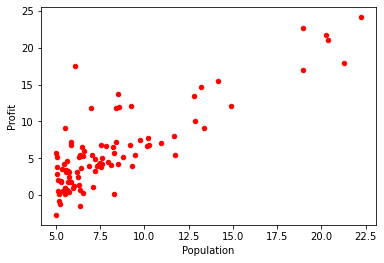

In [3]:
import matplotlib.pyplot as plt
data1.plot(kind='scatter', x='Population', y='Profit', color='red', marker='o')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

### 梯度下降实现线性回归,最小化成本函数

最小化成本函数cost function/J(theta),也就是单个损失函数Loss function的误差平均,loss function是定义在单个样本上的

In [4]:
def computeCost(X, y, theta):
    """compute the cost fuction"""
    loss =  np.power(((X * theta.T) - y),2)
    return np.sum(loss) / (2 * len(y))

处理data,并且提取出来X,y

In [5]:
data1.insert(0,'Ones',1)
#第一个是索引值,第二个是名字,第三个是值

In [6]:
#set X(training data) and y (target variable)
#从data1里提取X和y
#列数
cols = data1.shape[1]
X = data1.iloc[:,0:cols-1]
y = data1.iloc[:,cols-1:cols]

In [7]:
X.head() #展示出前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y.head() #展示出前五行

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是numpy的矩阵,所以需要转换X,y,(pandas的实例)并且初始化theta

In [9]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [10]:
theta = np.zeros(2)
theta = np.matrix(theta)
theta.shape, X.shape, y.shape, theta.T.shape
#array相比matrix不同是可以表示多元

((1, 2), (97, 2), (97, 1), (2, 1))

计算代价函数

In [11]:
computeCost(X,y,theta)

32.072733877455676

批量梯度下降batch gradient decent

In [12]:
def gradientDescent(X,y,theta,alpha,iters):
    """batch gradient decent"""
    #初始化temp
    temp = np.matrix(np.zeros(theta.shape))
    temp = temp.T
    cost = np.zeros(iters)
    theta_history = []
    #直接进行矩阵操作
    for i in range(iters):
        theta_history.append(theta[0,:])
        error = np.dot(X,theta.T) - y 
        term = np.dot(X.T,error)
        temp = temp - alpha * term / len(X)
        cost[i] = computeCost(X,y,theta)
        theta = temp.T
        
    
    return theta,cost,theta_history

In [13]:
alpha = 0.01
iters = 1000

In [14]:
g,cost,theta_history = gradientDescent(X,y,theta,alpha,iters)
g,cost,theta_history

(matrix([[-3.24140214,  1.1272942 ]]),
 array([32.07273388,  6.73719046,  5.93159357,  5.90115471,  5.89522859,
         5.89009494,  5.88500416,  5.87993248,  5.87487909,  5.86984391,
         5.86482687,  5.85982789,  5.85484692,  5.84988389,  5.84493874,
         5.8400114 ,  5.83510181,  5.8302099 ,  5.82533562,  5.82047889,
         5.81563965,  5.81081784,  5.8060134 ,  5.80122627,  5.79645638,
         5.79170367,  5.78696808,  5.78224955,  5.77754801,  5.77286341,
         5.76819568,  5.76354477,  5.75891061,  5.75429313,  5.7496923 ,
         5.74510803,  5.74054027,  5.73598897,  5.73145406,  5.72693549,
         5.72243319,  5.71794711,  5.71347718,  5.70902336,  5.70458558,
         5.70016379,  5.69575792,  5.69136792,  5.68699373,  5.6826353 ,
         5.67829257,  5.67396548,  5.66965398,  5.665358  ,  5.6610775 ,
         5.65681242,  5.6525627 ,  5.64832829,  5.64410913,  5.63990517,
         5.63571635,  5.63154261,  5.62738391,  5.6232402 ,  5.6191114 ,
         5.6

将上述训练好的模型画出来,并且观察直线拟合

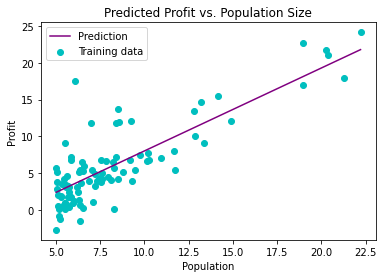

In [15]:
#取线上均匀的点
x = np.linspace(data1.Population.min(), data1.Population.max(),100)
f = g[0,0] + (g[0,1] * x)
plt.plot(x,f,color='purple',label='Prediction')
plt.scatter(data1.Population,data1.Profit,color='c',label='Training data')
plt.xlabel('Population')   #或者使用set_xlabel('Population')方法
plt.ylabel('Profit')
plt.title('Predicted Profit vs. Population Size')
plt.legend(loc=2)
plt.show()

### 下面画出损失函数vs迭代次数时候的变化

(-100.0, 1100.0, 4.0, 7.0)

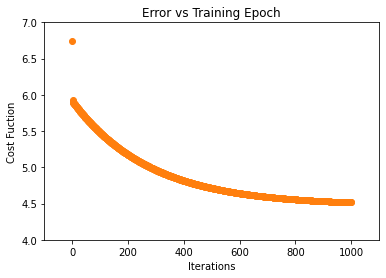

In [16]:
np.arange(iters)
plt.scatter(np.arange(iters),cost,c='C1')
plt.xlabel('Iterations')
plt.ylabel('Cost Fuction')
plt.title('Error vs Training Epoch')
plt.axis([-100,1100,4,7])

### 将损失函数,和梯度下降路径可视化

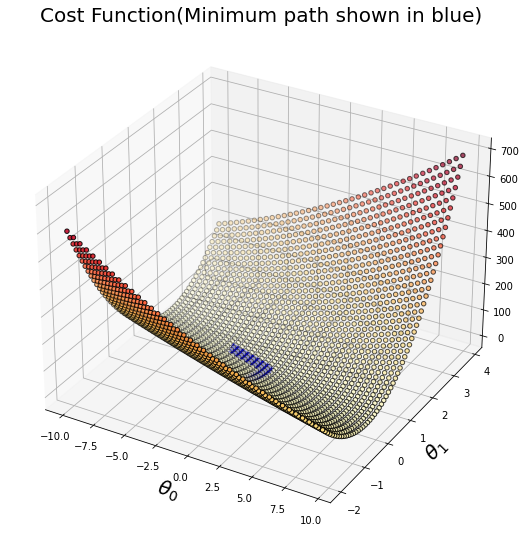

In [17]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1,projection='3d')

xvals = np.arange(-10,10,0.5)
yvals = np.arange(-2,4,0.1)
#为了将点数对应,上面只是生成xy的不重复的个数
myxs,myys,myzs = [], [], []
for theta0 in xvals:
    for theta1 in yvals:
        myxs.append(theta0)
        myys.append(theta1)
        myzs.append(computeCost(X,y,np.array([[theta0,theta1]])))

ax.scatter(myxs, myys, myzs,c=np.abs(myzs),cmap='YlOrRd',edgecolors='black')
ax.set_xlabel(r'$\theta_0$',fontsize=20)
ax.set_ylabel(r'$\theta_1$',fontsize=20)
ax.set_title('Cost Function(Minimum path shown in blue)',fontsize=20)
#plt.figure(dpi=256,figsize=(30,30))
#plt.show()
plt.plot([x[0,0] for x in theta_history],[x[0,1] for x in theta_history],cost,
    'bo-',linewidth=10)
#显示梯度下降路径

contour图,需要搞清楚x,y,z之间的对应关系

[[-10.  -10.  -10.  ... -10.  -10.  -10. ]
 [ -9.5  -9.5  -9.5 ...  -9.5  -9.5  -9.5]
 [ -9.   -9.   -9.  ...  -9.   -9.   -9. ]
 ...
 [  8.5   8.5   8.5 ...   8.5   8.5   8.5]
 [  9.    9.    9.  ...   9.    9.    9. ]
 [  9.5   9.5   9.5 ...   9.5   9.5   9.5]] [[-2.  -1.9 -1.8 ...  3.7  3.8  3.9]
 [-2.  -1.9 -1.8 ...  3.7  3.8  3.9]
 [-2.  -1.9 -1.8 ...  3.7  3.8  3.9]
 ...
 [-2.  -1.9 -1.8 ...  3.7  3.8  3.9]
 [-2.  -1.9 -1.8 ...  3.7  3.8  3.9]
 [-2.  -1.9 -1.8 ...  3.7  3.8  3.9]] [[597.12566953 566.5592157  536.80680131 ... 154.04472895 169.87852254
  186.52635555]
 [581.171302   551.01283818 521.66841378 ... 161.34579143 177.58757501
  194.64339802]
 [565.46693448 535.71646065 506.78002626 ... 168.8968539  185.54662748
  203.0104405 ]
 ...
 [173.31407107 157.84324725 143.18646285 ... 590.6840405  621.61346408
  653.35692709]
 [166.60970355 151.54686972 137.29807533 ... 607.23510297 638.57251656
  670.72396957]
 [160.15533602 145.5004922  131.6596878  ... 624.03616545 655.781569

array([  4.47845322,  53.32577885, 102.17310448, 151.02043011,
       199.86775574, 248.71508137, 297.562407  , 346.40973263,
       395.25705826, 444.10438389, 492.95170952, 541.79903515,
       590.64636078, 639.49368641, 688.34101204])

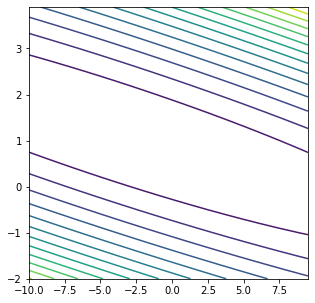

In [18]:
yv,xv = np.meshgrid(yvals,xvals)
zv = np.matrix(myzs)
zv = zv.reshape(xv.shape[0],xv.shape[1])
print(xv,yv,zv)
l = np.linspace(np.min(zv), np.max(zv), 15)
fig1 = plt.figure(figsize=(5,5))
plt.contour(xv,yv,zv,levels=l)
l

## 多元线性回归

In [19]:
data2 = pd.read_csv('ex1data2.txt',header=None,names=['size','Bedrooms','Price'])
data2.head()

,size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于这个多元线性回归,添加一步预处理数据,来提高速度,特征-归一化处理,本质就是求能让J(theta)最小的theta,这样对数据进行缩放后,并不影响J(theta)的增减性

In [20]:
data2 = (data2 - data2.mean())/data2.std()
data2.head()

,size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


重复之前的单变量线性回归操作

In [21]:
#x0
data2.insert(0,'Ones',1)

#set X(training data) and y(target variables)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1]

#convert to matrices and intialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2=np.matrix(np.array([[0,0,0]]))

#perform linear regression on the data set
g2,cost2,theta_history2 =gradientDescent(X2,y2,theta2,alpha,iters)

#看最后的cost函数的大小
computeCost(X2,y2,g2)


2.0147208878280035e-06

画出预测的线和原来的训练数据/经过归一化的数据

Text(0.5, 0.92, 'Price training data and prediction')

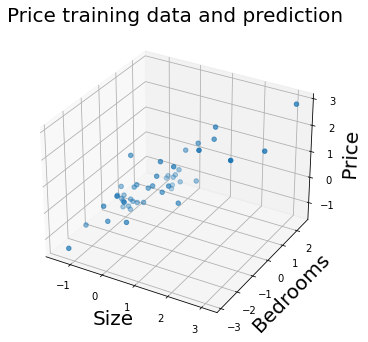

In [22]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,2,1,projection='3d')

x1 = X2[:,1]
x2 = X2[:,2]

#f2 = g2[0,0] + (g2[0,1] * x1) + (g2[0,2] * x2)
#f2.reshape(x1.shape[1],x2.shape[0])
#print(x1,x2,f2)

ax.scatter(x1,x2,y2,label='training data')
#预测数据的对应有问题,红点是有错误的
#ax.scatter3D(x1,x2,f2,color='r')

ax.set_xlabel('Size',fontsize=20)
ax.set_ylabel('Bedrooms',fontsize=20 )
ax.set_zlabel('Price',fontsize=20)
ax.set_title('Price training data and prediction',fontsize=20)


画出来costfuction

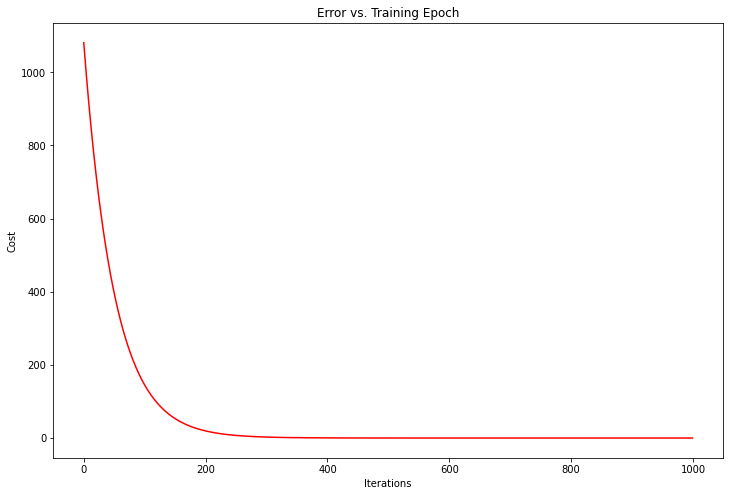

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost2,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### 用scikit-learn
[from sklearn import linear_model](https://github.com/fengdu78/Coursera-ML-AndrewNg-Notes/blob/master/code/ex1-linear%20regression/ML-Exercise1.ipynb)

In [25]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)
model.score(X,y)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy

0.7020315537841397

## 正规方程求解

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型

正规方程：不需要选择学习率α，一次计算得出，需要计算dot(X.T,X)-1，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为，通常来说当小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [ ]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [ ]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])